# Linear model for SO2

### Imports, load data, reindex data as timeseries


In [1]:
%matplotlib inline
from IPython.core.display import display
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.model_selection import cross_val_score
import utils

training_data = pd.read_csv('TRAINING_DATA.csv')
training_data = utils.reindex_df(training_data).sort_index()  # re-index into timeseries, and sort

,car.count,wind.velocity,wind.direction,time.of.day,day.index,temperature.1,temperature.30,temperature.1_temperature.30.diff,time.of.day.cos,time.of.day.sin,wind.direction.cos,wind.direction.sin,day.index.cos,day.index.sin
2010-03-05 13:00:00,7.64300,1.458615,322,13,32,8.5,8.3,0.2,0.907447,0.420167,0.555020,0.831837,0.834223,0.551427
2010-03-05 14:00:00,7.75061,1.504077,307,14,32,8.2,8.4,0.2,0.136737,0.990607,0.165122,-0.986273,0.834223,0.551427
2010-03-06 08:00:00,8.12415,1.029619,209,8,33,5.2,5.5,0.3,-0.145500,0.989358,-0.273144,0.961973,-0.013277,0.999912
2010-03-06 10:00:00,7.64108,0.832909,247,10,33,6.7,6.3,0.4,-0.839072,-0.544021,-0.041351,0.999145,-0.013277,0.999912
2010-03-07 01:00:00,6.18002,1.568616,215,1,34,8.9,9.9,1.0,0.540302,0.841471,-0.943019,0.332739,-0.848570,0.529083


,so2,car.count,wind.velocity,wind.direction,time.of.day,day.index,temperature.1,temperature.30,temperature.1_temperature.30.diff,time.of.day.cos,time.of.day.sin,wind.direction.cos,wind.direction.sin,day.index.cos,day.index.sin
so2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
car.count,0.450208,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
wind.velocity,-0.366676,0.035944,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
wind.direction,-0.009378,0.064155,-0.045455,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
time.of.day,0.063943,0.511144,0.037106,0.080221,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
day.index,-0.104131,-0.011378,0.042725,-0.101117,-0.041248,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
temperature.1,-0.183750,0.190281,0.198623,0.371805,0.029248,0.346944,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
temperature.30,-0.162010,0.157376,0.177017,0.394362,0.029949,0.299651,0.989076,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
temperature.1_temperature.30.diff,0.243558,-0.066621,-0.165971,0.291138,0.007060,-0.065809,0.099280,0.157757,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
time.of.day.cos,-0.048869,-0.059020,-0.081309,0.028118,-0.222565,-0.080722,-0.029870,-0.021277,0.158734,1.000000,0.000000,0.000000,0.000000,0.000000,0.0


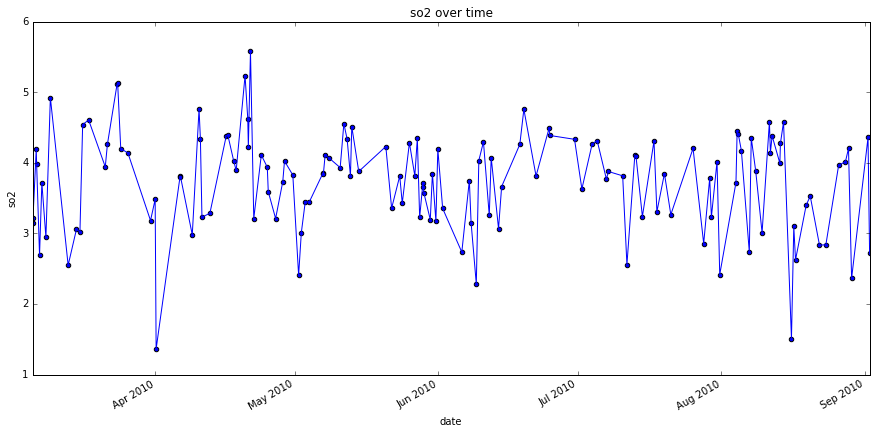

In [2]:
# add features
def mavg(df, col, window):
    col_name = col+'.mavg'
    df[col_name] = pd.rolling_mean(df[col], window).fillna(method='bfill')
    return col_name

def diff(df, col_1, col_2):
    col_name = col_1+'_'+col_2+'.diff'
    df[col_name] = abs(df[col_1]-df[col_2])
    return col_name

# remove duplicate observations
training_data.drop_duplicates(inplace=True)
# log transform of some features
training_data = utils.log_transform_df(training_data, features=['car.count', 'so2', 'wind.velocity'])
# training_data = utils.log_transform_df(training_data, features=['car.count', 'so2'])
diff(training_data, 'temperature.1', 'temperature.30')
# training_data['temperature.1_temperature.30.diff'] = np.log(training_data['temperature.1_temperature.30.diff'])
training_data['time.of.day.cos'] = np.cos(training_data['time.of.day'])
training_data['time.of.day.sin'] = np.sin(training_data['time.of.day'])
training_data['wind.direction.cos'] = np.cos(training_data['wind.direction']/(2*math.pi))
training_data['wind.direction.sin'] = np.sin(training_data['wind.direction']/(2*math.pi))
training_data['day.index.cos'] = np.cos(training_data['day.index'])
training_data['day.index.sin'] = np.sin(training_data['day.index'])
# training_data.drop('wind.direction', 1, inplace=True)
# training_data.drop('time.of.day', 1, inplace=True)
# training_data.drop('day.index', 1, inplace=True)
# training_data.drop('temperature.30', 1, inplace=True)

X, y = utils.split_df(training_data, 'so2')
display(X.head(5))
corr_matrix = np.tril(np.corrcoef([training_data[x] for x in list(training_data)]))
corr_matrix_df = pd.DataFrame(corr_matrix, columns=list(training_data), index=list(training_data))
display(corr_matrix_df)
utils.plot_timeseries(X, y)

In [3]:
def test_model(X, y):
    reg = linear_model.LinearRegression(normalize=True)
    return cross_val_score(reg, X, y, cv=3)

from itertools import combinations
max_r_sq = 0
optimal_features = []
for i in xrange(1, len(list(X))):
    feature_combinations = combinations(list(X), i)
    for feature_vec in feature_combinations:
        feature_vec = list(feature_vec)
        scores = test_model(X[feature_vec], y)
        if scores.mean() > max_r_sq:
            max_r_sq = scores.mean()
            optimal_features = feature_vec
            if scores.mean() > .4:
                display("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), feature_vec)

/Users/thibautxiong/Documents/Development/venvs/trading_venv/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


'Accuracy: 0.43 (+/- 0.29)'

['car.count',
 'wind.velocity',
 'time.of.day',
 'temperature.1',
 'temperature.30',
 'temperature.1_temperature.30.diff']

'Accuracy: 0.43 (+/- 0.25)'

['car.count',
 'wind.velocity',
 'time.of.day',
 'temperature.1',
 'temperature.1_temperature.30.diff',
 'time.of.day.cos']

'Accuracy: 0.46 (+/- 0.27)'

['car.count',
 'wind.velocity',
 'time.of.day',
 'temperature.1',
 'temperature.30',
 'temperature.1_temperature.30.diff',
 'time.of.day.cos']

'Accuracy: 0.47 (+/- 0.27)'

['car.count',
 'wind.velocity',
 'time.of.day',
 'temperature.1',
 'temperature.30',
 'temperature.1_temperature.30.diff',
 'time.of.day.cos',
 'time.of.day.sin']

'Accuracy: 0.47 (+/- 0.27)'

['car.count',
 'wind.velocity',
 'time.of.day',
 'temperature.1',
 'temperature.30',
 'temperature.1_temperature.30.diff',
 'time.of.day.cos',
 'day.index.sin']

'Accuracy: 0.47 (+/- 0.26)'

['car.count',
 'wind.velocity',
 'time.of.day',
 'day.index',
 'temperature.1',
 'temperature.30',
 'temperature.1_temperature.30.diff',
 'time.of.day.cos',
 'day.index.sin']

'Accuracy: 0.48 (+/- 0.26)'

['car.count',
 'wind.velocity',
 'time.of.day',
 'temperature.1',
 'temperature.30',
 'temperature.1_temperature.30.diff',
 'time.of.day.cos',
 'time.of.day.sin',
 'day.index.sin']

'Accuracy: 0.48 (+/- 0.26)'

['car.count',
 'wind.velocity',
 'time.of.day',
 'day.index',
 'temperature.1',
 'temperature.30',
 'temperature.1_temperature.30.diff',
 'time.of.day.cos',
 'time.of.day.sin',
 'day.index.sin']

in-sample r^2:  0.568788114111
coeffs: 


[('car.count', 0.50676176352385027),
 ('wind.velocity', -0.2820309613035113),
 ('time.of.day', -0.036256119831125783),
 ('day.index', 0.00069142716532454148),
 ('temperature.1', -0.18014976926679535),
 ('temperature.30', 0.15275713590426815),
 ('temperature.1_temperature.30.diff', 0.21454120945627342),
 ('time.of.day.cos', -0.18556890685973582),
 ('time.of.day.sin', -0.064527746839366837),
 ('day.index.sin', -0.1237035919582727)]

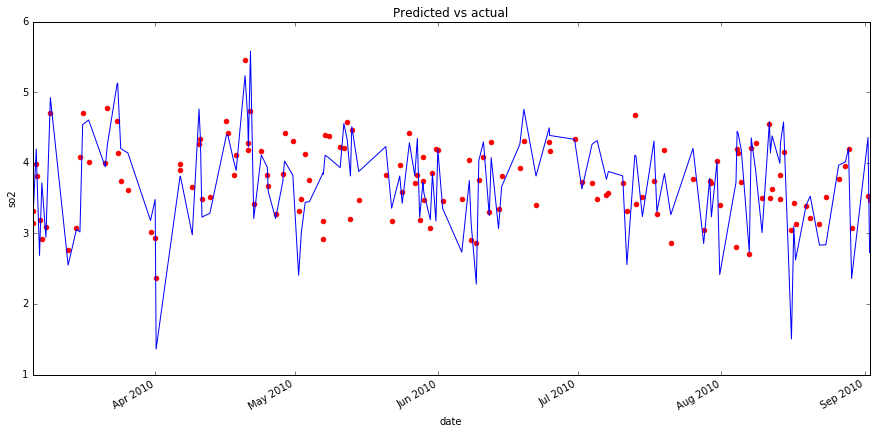

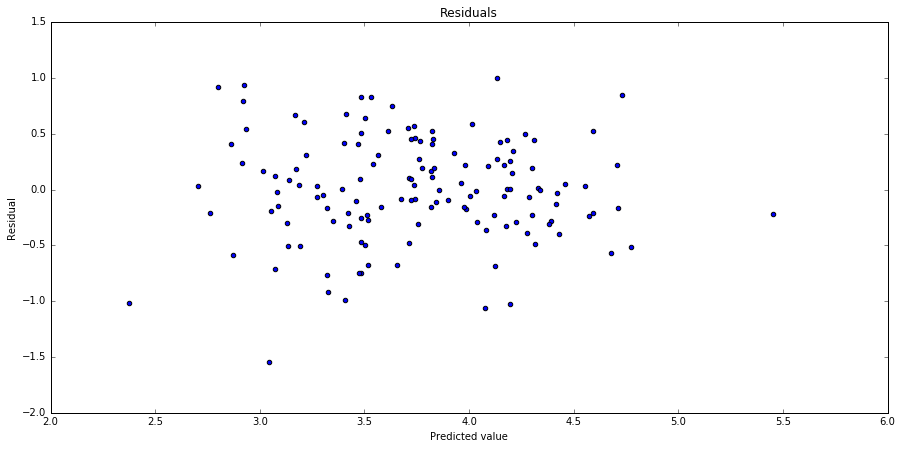

In [4]:
reg = linear_model.LinearRegression()
reg.fit(X[optimal_features], y)
predicted = reg.predict(X[optimal_features])
print 'in-sample r^2: ', reg.score(X[optimal_features], y)
print 'coeffs: '
display([(coeff, name) for name, coeff in zip(reg.coef_, X[optimal_features])])
utils.plot_predicted_vs_expected(y, predicted, X.index)
utils.plot_residuals(y, predicted)

In [6]:
test_data = pd.read_csv('TESTING_DATA.csv')
test_data = utils.reindex_df(testing_data).sort_index()  # re-index into timeseries, and sort
display(test_data.head(5))

,car.count,wind.velocity,wind.direction,time.of.day,day.index,temperature.1,temperature.30
2010-03-06 17:00:00,4089.998981,1.2,265,17,33,6.3,7.6
2010-03-06 18:00:00,3109.011161,1.2,261,18,33,6.2,7.5
2010-03-07 21:00:00,931.000673,7.5,220,21,34,7.8,8.6
2010-03-08 16:00:00,2870.007724,2.8,317,16,35,7.3,8.0
2010-03-09 03:00:00,118.999584,1.1,291,3,36,-1.0,1.3
